The puprose of this notebook is to compare various statistics on price volatility, support and resistance, and volume of top cryptocurrency asset. 

In [9]:
import os
import json
import requests 
from datetime import date, datetime, timedelta
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)}) 

from cryptocompare import get_daily_trades
import plot

In [3]:
prices = {}
price_dir = 'price_data/'
files = list(os.walk(price_dir))[0][2]
for filename in files:
    if not ('POLONIEX' in filename):
        continue  
    exchange, base, quote = filename.split('_')
    market = '_'.join([base,quote])
    prices[market] = pd.read_csv(price_dir+filename, infer_datetime_format=['date'], index_col='date')

In [17]:
ohlcv = pd.DataFrame({m: prices[m].close for m in prices})
ohlcv.index = pd.to_datetime(ohlcv.index)

In [18]:
ohlcv.shape

(163263, 23)

Number of observations 

In [19]:
observation_count = (~ohlcv.isnull()).sum().sort_values()
observation_count#.plot(kind='barh')

USDT_EOS       4241
BTC_BCH       38082
USDT_BCH      38082
BTC_ZEC       65862
USDT_ETC      74761
BTC_ETC       75135
USDT_ETH     108823
BTC_ETH      108828
USDT_STR     123161
USDT_LTC     123546
USDT_XRP     124992
USDT_BTC     125092
USDT_DASH    125346
USDT_XMR     125348
BTC_DGB      126045
BTC_BTS      143113
BTC_XRP      143297
BTC_STR      143526
BTC_BCN      151476
BTC_XMR      151642
BTC_DASH     161278
BTC_DOGE     162901
BTC_LTC      163263
dtype: int64

In [20]:
ohlcv = ohlcv.drop(observation_count.index[:1], axis=1).dropna()
ohlcv.shape

(38081, 22)

Volatility

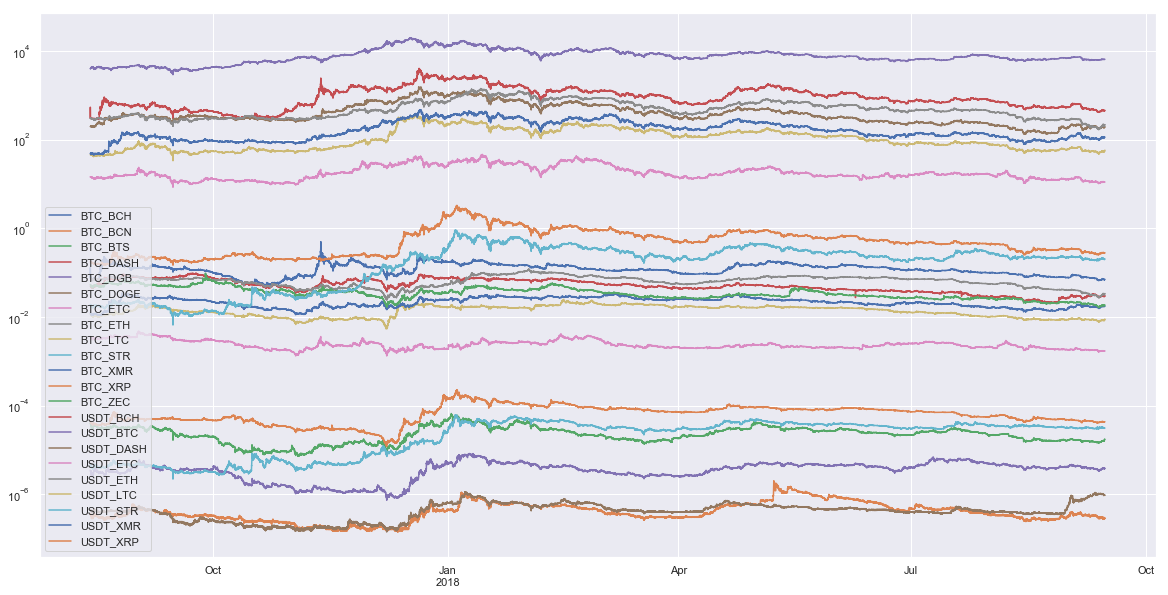

In [21]:
ohlcv.plot(logy=True)

Number of up days versus down days

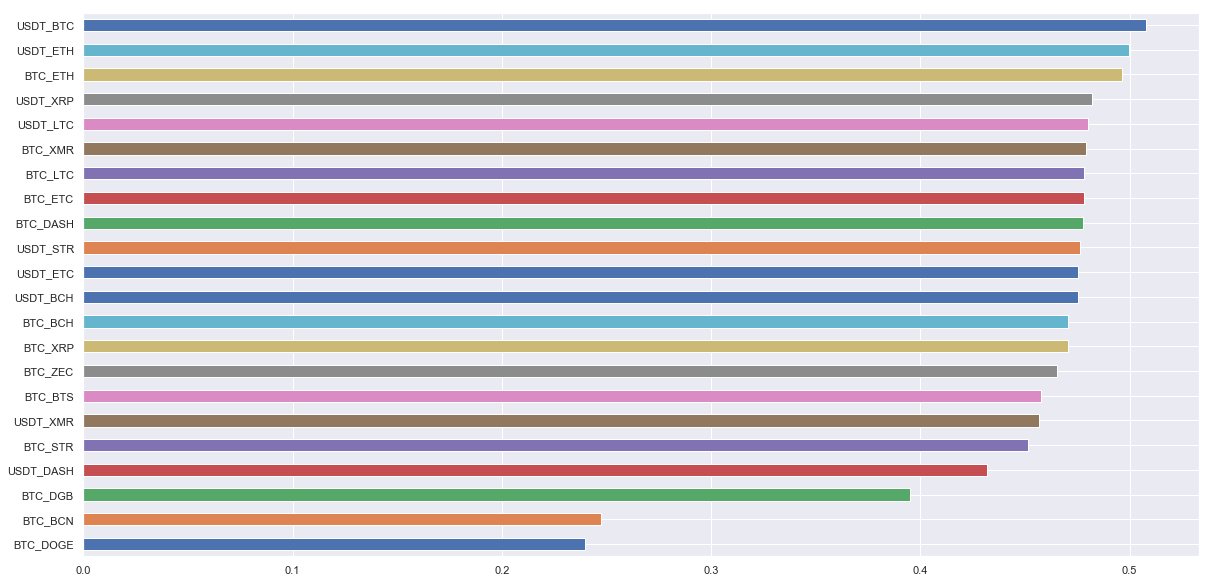

In [96]:
pos_returns = ohlcv.pct_change() > 0
(pos_returns.sum() / pos_returns.shape[0]).sort_values().plot(kind='barh')

In [97]:
(pos_returns.index[-1] - pos_returns.index[0]) / pos_returns.sum()

BTC_BCH     00:31:52.713472
BTC_BCN     01:00:39.762107
BTC_BTS     00:32:46.603546
BTC_DASH    00:31:22.973462
BTC_DGB     00:37:57.511961
BTC_DOGE    01:02:34.601226
BTC_ETC     00:31:22.870014
BTC_ETH     00:30:13.333333
BTC_LTC     00:31:22.249560
BTC_STR     00:33:13.717277
BTC_XMR     00:31:18.329496
BTC_XRP     00:31:53.354175
BTC_ZEC     00:32:14.413275
USDT_BCH    00:31:33.899204
USDT_BTC    00:29:31.620573
USDT_DASH   00:34:44.798345
USDT_ETC    00:31:33.480662
USDT_ETH    00:30:00.756620
USDT_LTC    00:31:13.913281
USDT_STR    00:31:29.826302
USDT_XMR    00:32:50.787809
USDT_XRP    00:31:07.175156
dtype: timedelta64[ns]

In [98]:
return_direction = (pos_returns*2)-1
#return_direction

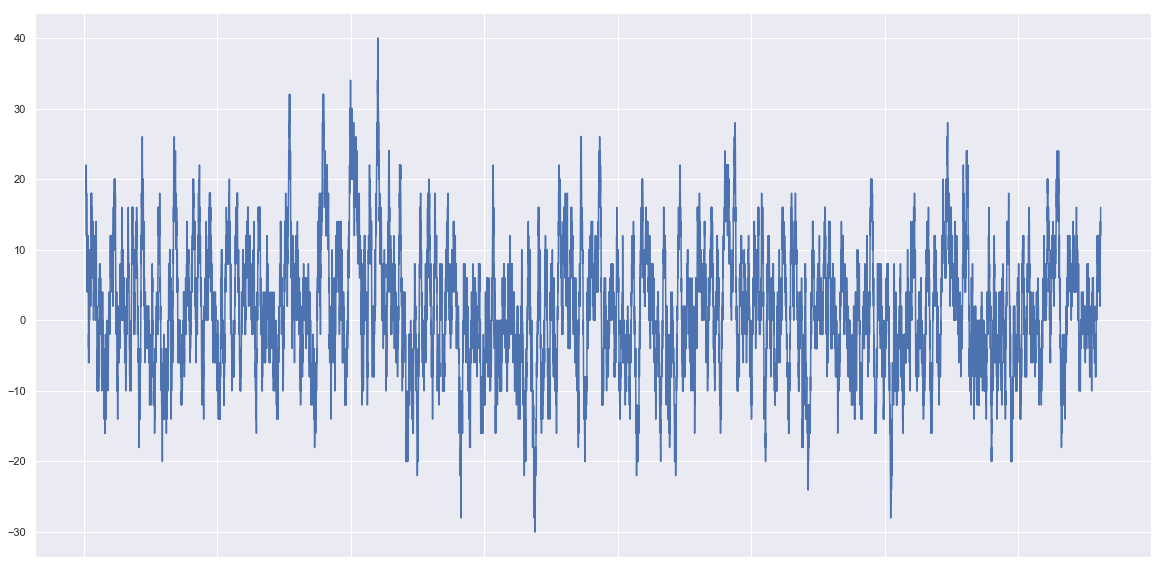

In [23]:
return_direction.USDT_BTC.rolling(4 * 24).sum().plot()

In [24]:
ohlcv.index

DatetimeIndex(['2017-08-14 03:30:00', '2017-08-14 03:45:00',
               '2017-08-14 04:00:00', '2017-08-14 04:15:00',
               '2017-08-14 04:30:00', '2017-08-14 04:45:00',
               '2017-08-14 05:00:00', '2017-08-14 05:15:00',
               '2017-08-14 05:30:00', '2017-08-14 05:45:00',
               ...
               '2018-09-14 17:15:00', '2018-09-14 17:30:00',
               '2018-09-14 17:45:00', '2018-09-14 18:00:00',
               '2018-09-14 18:15:00', '2018-09-14 18:30:00',
               '2018-09-14 18:45:00', '2018-09-14 19:00:00',
               '2018-09-14 19:15:00', '2018-09-14 19:30:00'],
              dtype='datetime64[ns]', length=38081, freq=None)

In [27]:
ohlcv_daily = ohlcv.groupby(ohlcv.index.date).mean()
return_direction_daily = ((ohlcv_daily.pct_change() > 0)*2) - 1

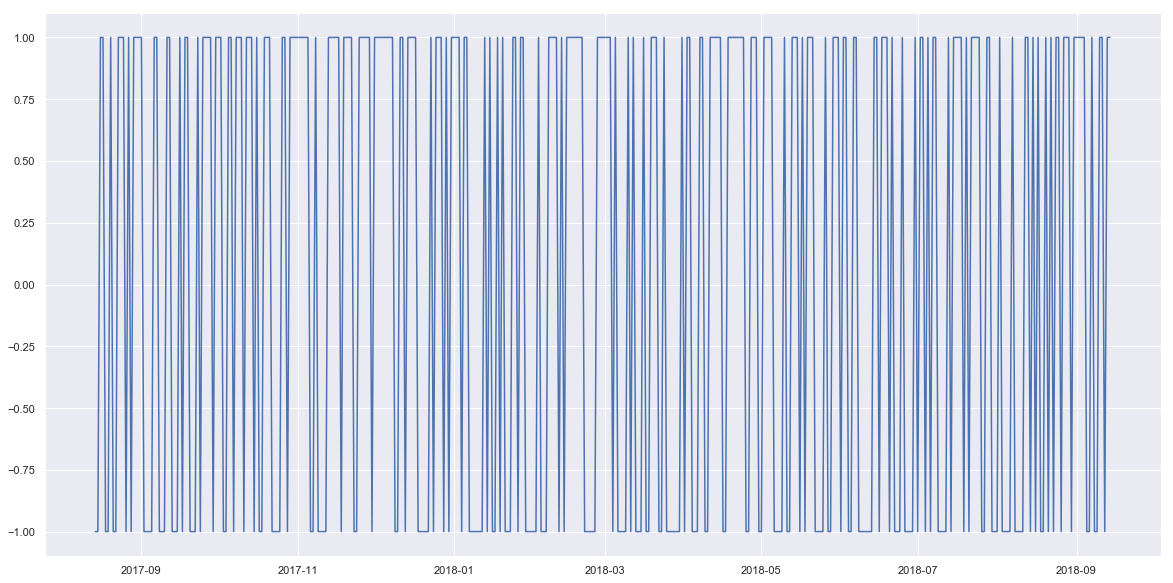

In [29]:
return_direction_daily.USDT_BTC.plot()

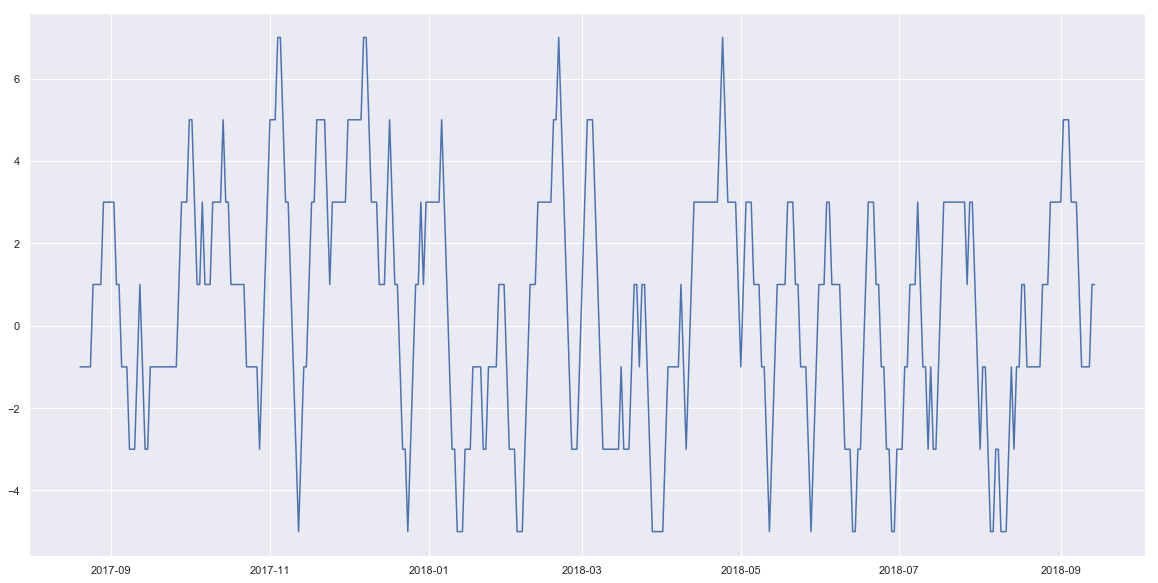

In [33]:
return_direction_daily.USDT_BTC.rolling(7).sum().plot()#hist()#plot()

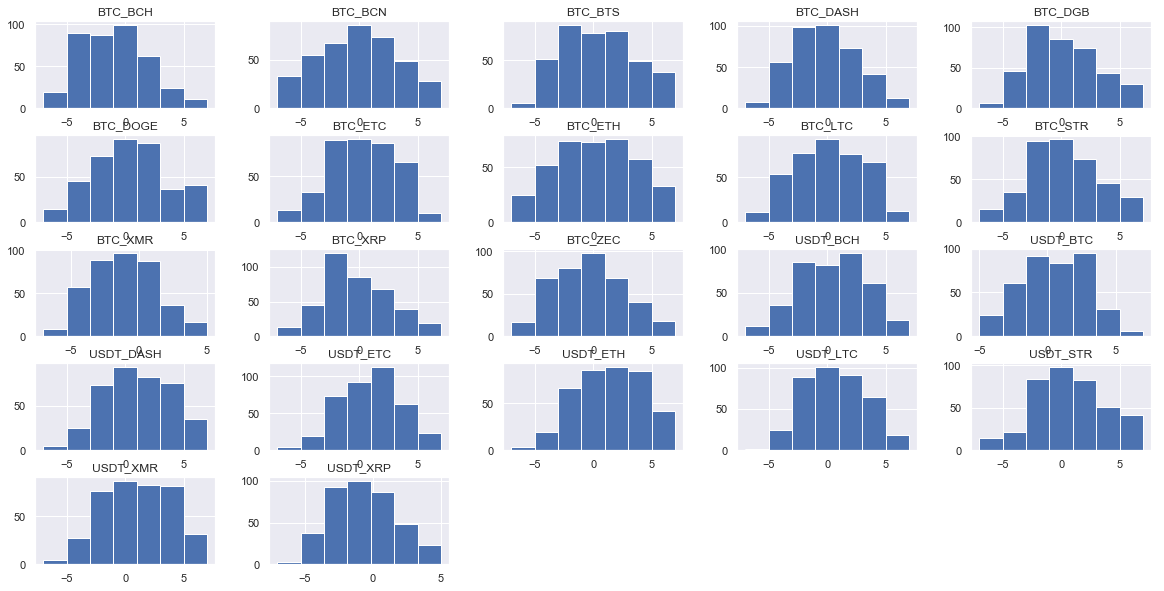

In [70]:
_ = return_direction_daily.rolling(7).sum().hist(bins=7)

In [77]:
return_direction_daily.rolling(7).sum().describe().T.sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
BTC_BCH,391.0,-1.895141,2.901238,-7.0,-5.0,-1.0,-1.0,7.0
BTC_ZEC,391.0,-1.317136,3.068732,-7.0,-3.0,-1.0,1.0,7.0
BTC_XRP,391.0,-1.235294,2.911671,-7.0,-3.0,-1.0,1.0,7.0
BTC_DASH,391.0,-1.199488,2.790294,-7.0,-3.0,-1.0,1.0,7.0
BTC_XMR,391.0,-1.086957,2.814360,-7.0,-3.0,-1.0,1.0,5.0
BTC_BCN,391.0,-1.066496,3.450110,-7.0,-3.0,-1.0,1.0,7.0
BTC_LTC,391.0,-0.836317,2.965409,-7.0,-3.0,-1.0,1.0,7.0
BTC_ETH,391.0,-0.790281,3.402414,-7.0,-3.0,-1.0,1.0,7.0
BTC_DGB,391.0,-0.764706,3.086095,-7.0,-3.0,-1.0,1.0,7.0
BTC_ETC,391.0,-0.734015,2.844850,-7.0,-3.0,-1.0,1.0,7.0


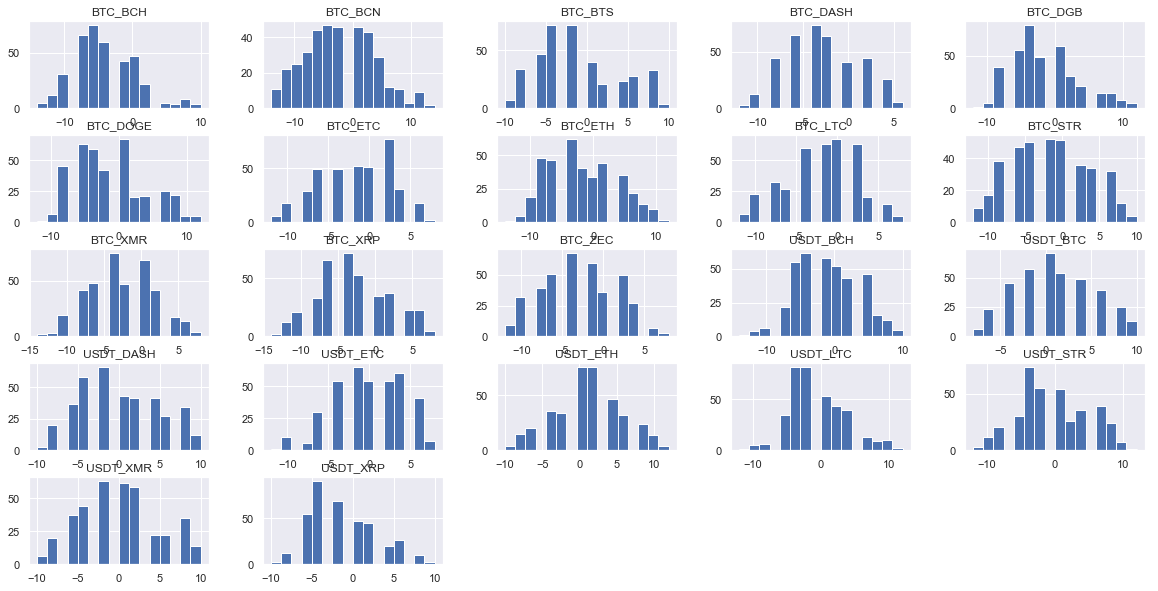

In [85]:
_ = return_direction_daily.rolling(16).sum().hist(bins=16)

In [83]:
return_direction.rolling(4 * 4).sum().describe().T

,count,mean,std,min,25%,50%,75%,max
BTC_BCH,38066.0,-0.943624,3.759599,-14.0,-4.0,0.0,2.0,12.0
BTC_BCN,38066.0,-8.087112,2.852139,-16.0,-10.0,-8.0,-6.0,8.0
BTC_BTS,38066.0,-1.356013,3.642595,-14.0,-4.0,-2.0,2.0,12.0
BTC_DASH,38066.0,-0.705301,3.737984,-14.0,-4.0,0.0,2.0,14.0
BTC_DGB,38066.0,-3.356013,3.684273,-16.0,-6.0,-4.0,0.0,10.0
BTC_DOGE,38066.0,-8.329375,2.747361,-16.0,-10.0,-8.0,-6.0,6.0
BTC_ETC,38066.0,-0.701834,3.656303,-14.0,-4.0,0.0,2.0,12.0
BTC_ETH,38066.0,-0.117953,3.893831,-14.0,-2.0,0.0,2.0,14.0
BTC_LTC,38066.0,-0.700205,3.613992,-14.0,-4.0,0.0,2.0,14.0
BTC_STR,38066.0,-1.554406,3.740308,-14.0,-4.0,-2.0,0.0,14.0


In [89]:
START = datetime(2018,1,1)
END = datetime(2018,2,1)
MARKET = 'USDT_ETC'

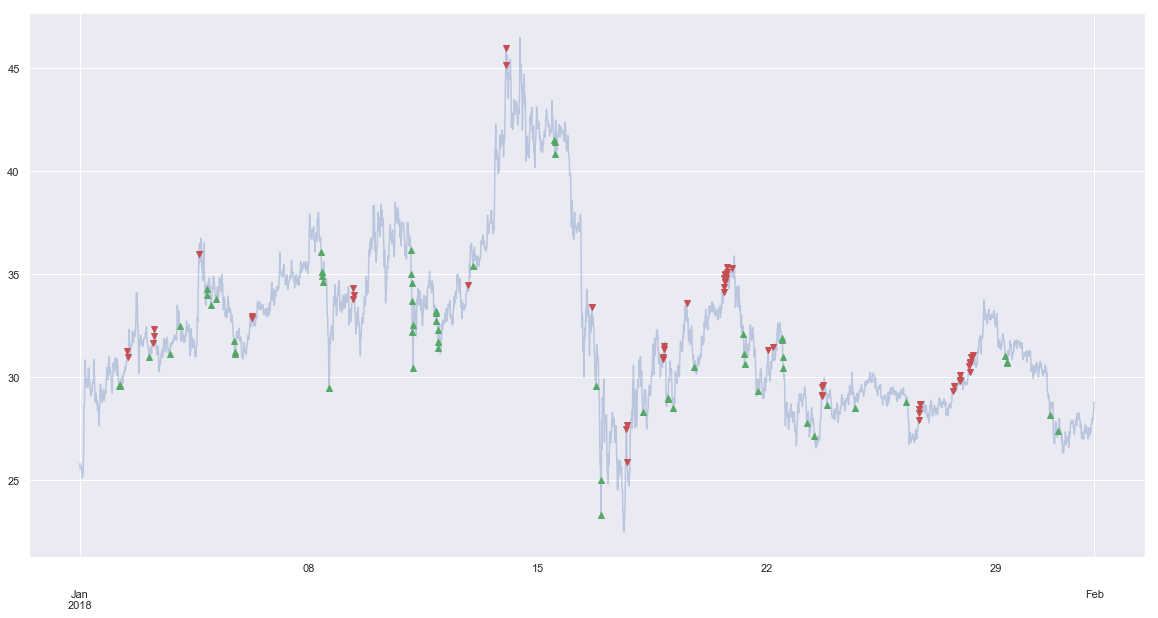

In [117]:
price_df = ohlcv[START:END][MARKET]
return_df = return_direction[START:END][MARKET]
price_df.plot(alpha=.3)
#ymin, ymax = ax.get_ybound()
buy_signal = return_df.rolling(8).sum()<-5
sell_signal = return_df.rolling(8).sum()>5
price_df[buy_signal].plot(marker='^', ls='', color='g')
price_df[sell_signal].plot(marker='v', ls='', color='r')

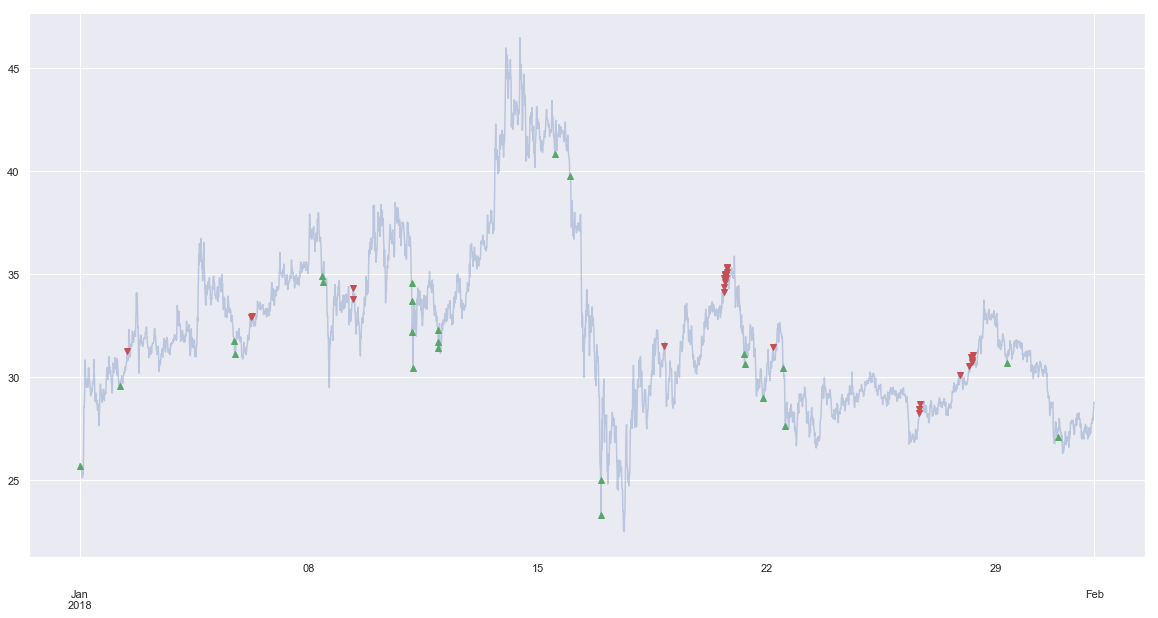

In [129]:

price_df = ohlcv[START:END][MARKET]
return_df = return_direction[START:END][MARKET]
price_df.plot(alpha=.3)
#ymin, ymax = ax.get_ybound()
buy_signal = return_df.ewm(8).mean()<-.5
sell_signal = return_df.ewm(8).mean()>.5
price_df[buy_signal].plot(marker='^', ls='', color='g')
price_df[sell_signal].plot(marker='v', ls='', color='r')

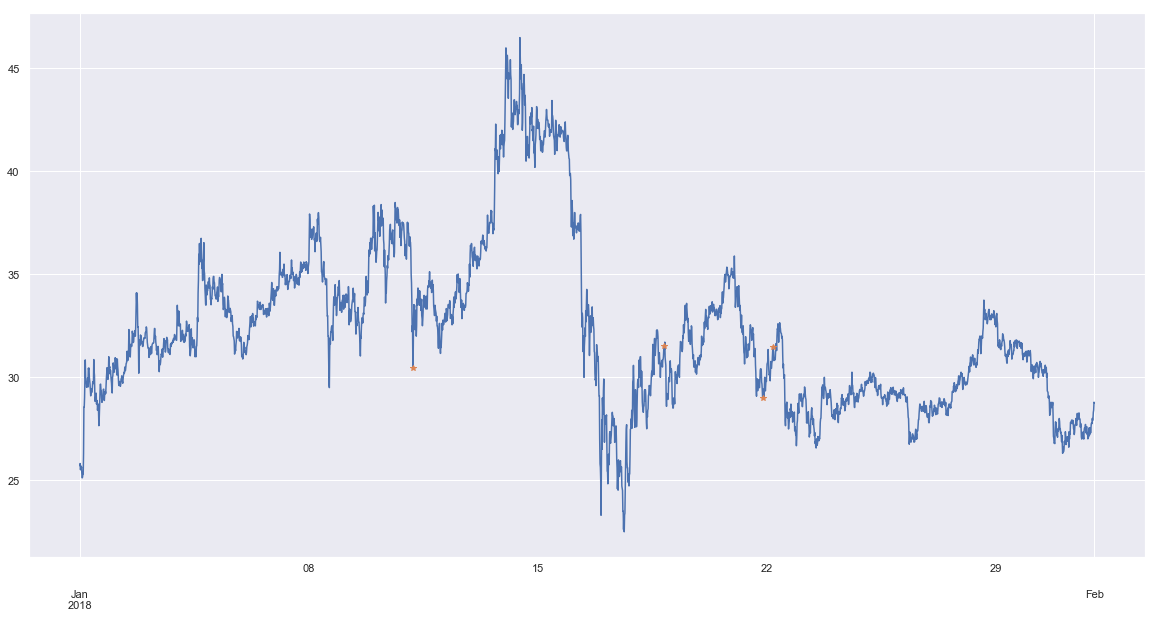

In [165]:
price_df.plot()
new_buy_signals = return_df[buy_signal|sell_signal].sort_index().diff().diff()
#new_buy_signals
new_buy_signals = new_buy_signals[new_buy_signals.diff().diff()==2]
price_df[new_buy_signals.index].plot(marker='*',ls='')#.reset_index().tail(20)#.USDT_ETC.diff()

In [112]:
buy_signal.sum(), sell_signal.sum()

(62, 57)

In [76]:
return_direction_daily.sum()#.describe().T

BTC_BCH     -107.0
BTC_BCN      -61.0
BTC_BTS      -33.0
BTC_DASH     -67.0
BTC_DGB      -43.0
BTC_DOGE     -33.0
BTC_ETC      -41.0
BTC_ETH      -45.0
BTC_LTC      -47.0
BTC_STR      -41.0
BTC_XMR      -61.0
BTC_XRP      -71.0
BTC_ZEC      -75.0
USDT_BCH     -33.0
USDT_BTC      25.0
USDT_DASH      3.0
USDT_ETC      -3.0
USDT_ETH      23.0
USDT_LTC     -17.0
USDT_STR     -15.0
USDT_XMR       3.0
USDT_XRP     -37.0
dtype: float64

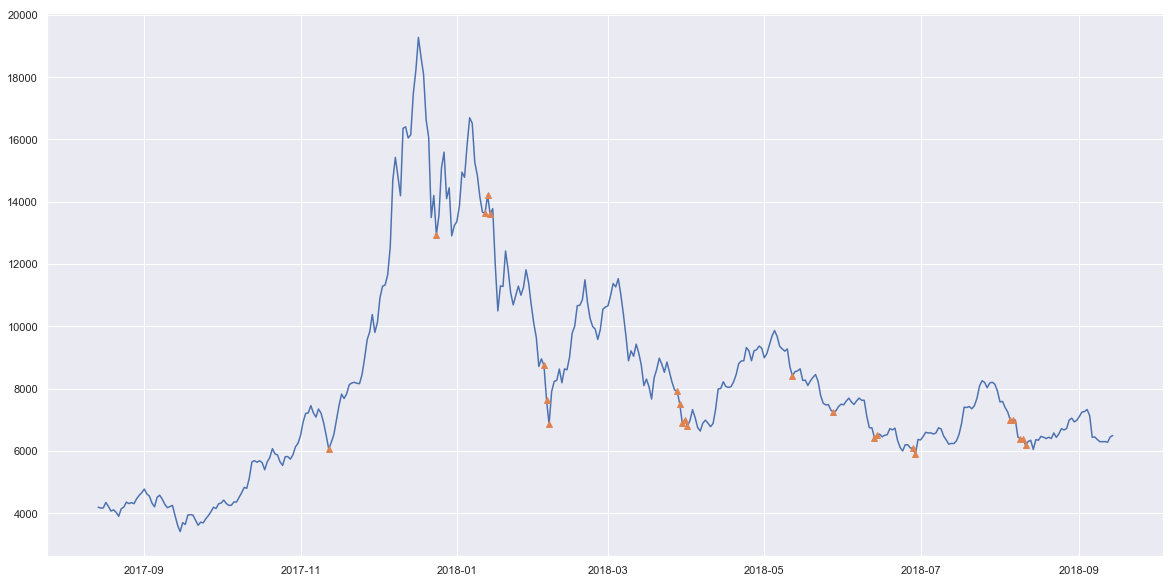

In [64]:
ax = ohlcv_daily.USDT_BTC.plot()
ymin, ymax = ax.get_ybound()

buy_signal = return_direction_daily.USDT_BTC.rolling(7).sum()<-4
sell_signal = return_direction_daily.USDT_BTC.rolling(7).sum()>4
'''plt.fill_between(ohlcv_daily.index, 
                 ymin, ymax, 
                 where=buy_signal, alpha=.2)'''
ohlcv_daily.USDT_BTC[buy_signal].plot(marker='^', ls='')

In [ ]:
(buy_signal+sell_signal/2).plot()

In [1]:
c = return_direction.rolling(4 * 24).sum().corr()
plot.corr(c, annot=True)

NameError: name 'return_direction' is not defined

In [25]:
ohlcv.USDT_BTC

2014-01-18 04:15:00            NaN
2014-01-18 04:30:00            NaN
2014-01-18 04:45:00            NaN
2014-01-18 05:00:00            NaN
2014-01-18 05:15:00            NaN
2014-01-18 05:30:00            NaN
2014-01-18 05:45:00            NaN
2014-01-18 06:00:00            NaN
2014-01-18 06:15:00            NaN
2014-01-18 06:30:00            NaN
2014-01-18 06:45:00            NaN
2014-01-18 07:00:00            NaN
2014-01-18 07:15:00            NaN
2014-01-18 07:30:00            NaN
2014-01-18 07:45:00            NaN
2014-01-18 08:00:00            NaN
2014-01-18 08:15:00            NaN
2014-01-18 08:30:00            NaN
2014-01-18 08:45:00            NaN
2014-01-18 09:00:00            NaN
2014-01-18 09:15:00            NaN
2014-01-18 09:30:00            NaN
2014-01-18 09:45:00            NaN
2014-01-18 10:00:00            NaN
2014-01-18 10:15:00            NaN
2014-01-18 10:30:00            NaN
2014-01-18 10:45:00            NaN
2014-01-18 11:00:00            NaN
2014-01-18 11:15:00 